<a href="https://colab.research.google.com/github/Hasibur445/MNIST_classification/blob/main/MNIST_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [34]:
#from google.colab import drive
#drive.mount('/content/drive')

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D,Flatten, Bidirectional, LSTM, GRU
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Load Dataset

In [36]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [37]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Visualize

In [38]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


# Model Initialization

In [39]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [40]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

# Model Training

In [41]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 5ms/step - loss: 0.2026 - accuracy: 0.9380 - val_loss: 0.0643 - val_accuracy: 0.9812
Epoch 2/30
750/750 [==============================] - 3s 5ms/step - loss: 0.0553 - accuracy: 0.9828 - val_loss: 0.0488 - val_accuracy: 0.9847
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0397 - accuracy: 0.9868 - val_loss: 0.0432 - val_accuracy: 0.9872
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0392 - val_accuracy: 0.9887
Epoch 5/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0333 - val_accuracy: 0.9902
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0441 - val_accuracy: 0.9875
Epoch 7/30
750/750 [==============================] - 3s 5ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0424 - val_accuracy: 0.9883
Epoch 

# Evaluation

In [42]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9929
Test Accuracy: 99.29%


In [43]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[1.8883285e-16 2.9294338e-13 3.9008992e-13 ... 1.0000000e+00
  1.4459834e-15 3.7262805e-15]
 [2.8067270e-18 2.5811586e-15 1.0000000e+00 ... 4.1712524e-20
  1.4990769e-16 4.5076764e-25]
 [4.4473803e-11 9.9999988e-01 4.0428616e-09 ... 3.6819940e-09
  1.7745121e-09 9.6966678e-14]
 ...
 [1.1021929e-22 3.4614946e-20 9.4547654e-19 ... 3.0668009e-17
  1.7146728e-16 1.1523944e-15]
 [1.6259555e-22 2.0048115e-28 8.1525410e-26 ... 1.1193725e-26
  4.1021687e-12 8.5284635e-16]
 [5.8456899e-16 2.1921346e-19 4.0016023e-17 ... 1.2608103e-22
  3.0731955e-13 1.6973325e-20]]
[7 2 1 ... 4 5 6]


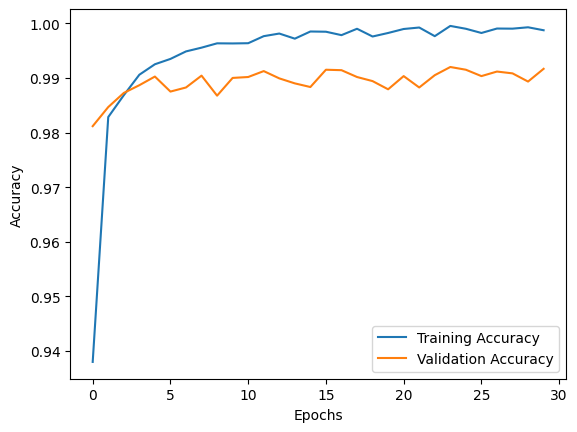

In [44]:

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Single Example

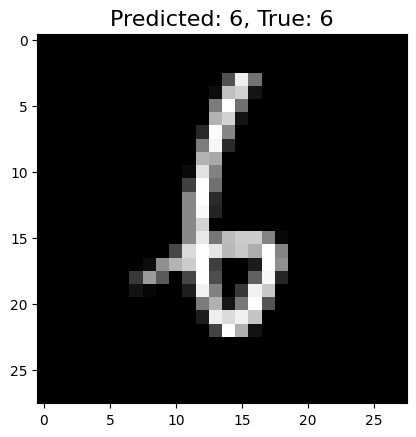

In [45]:

# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

## Confusion Matrix

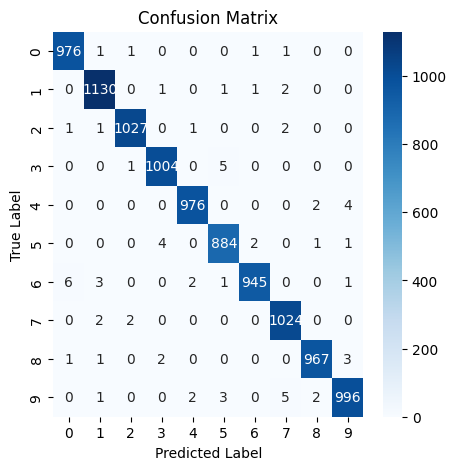

In [46]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investigating Errors

In [47]:

errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [48]:

y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

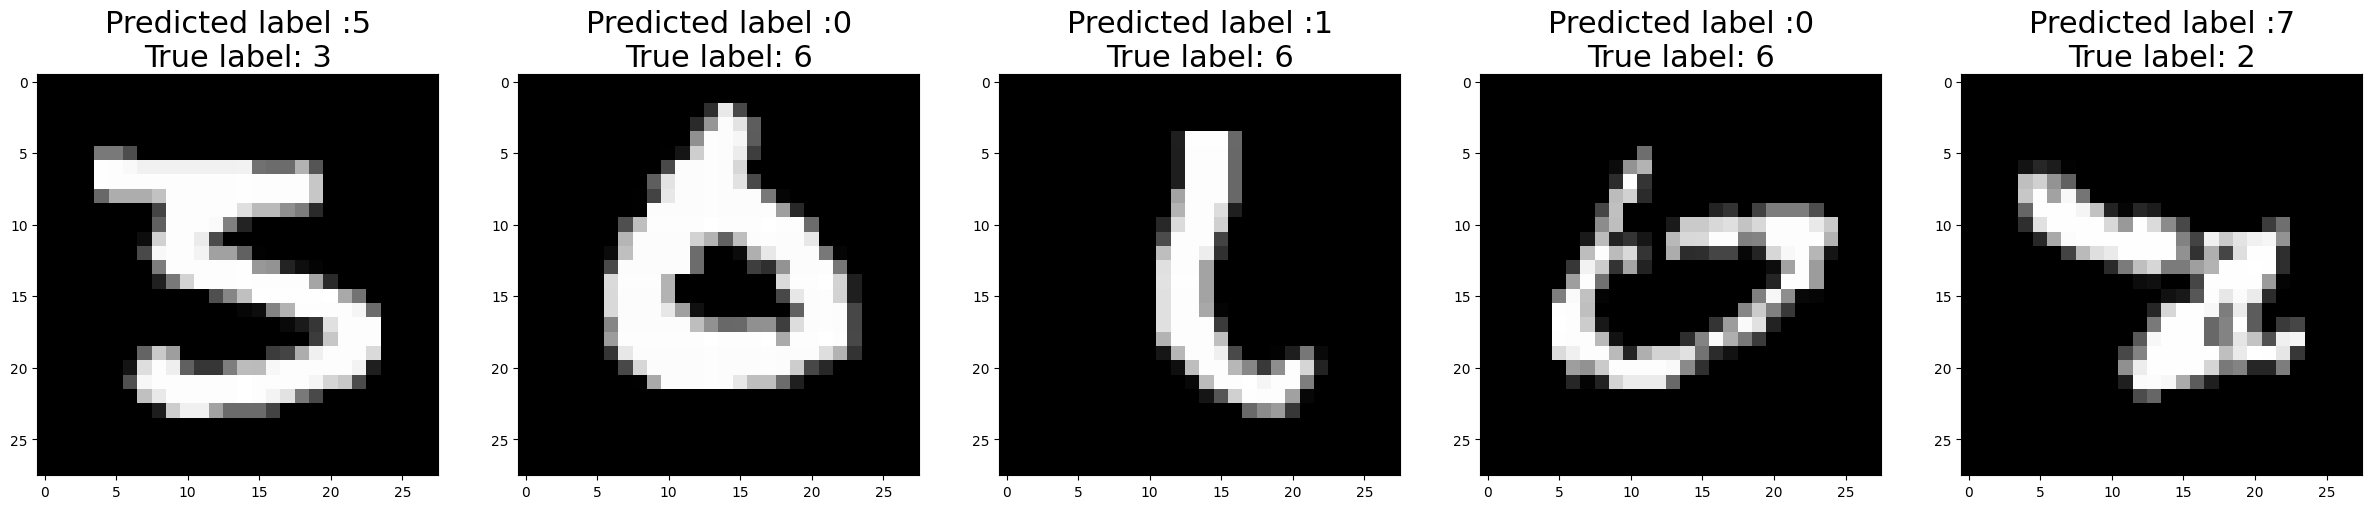

In [49]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)